In [44]:
def single_seq_fraction(mutation_order, mutation_rate, length=21, letter_book_size=4):
    return (1 - mutation_rate) ** (length - mutation_order) * (mutation_rate / (letter_book_size - 1)) ** mutation_order


def combination(n, k):
    from math import factorial
    return factorial(n) / (factorial(n - k) * factorial(k))


def num_of_seq(mutation_order, length=21, letter_book_size=4):
    return combination(length, mutation_order) * (letter_book_size - 1) ** mutation_order

In [43]:
import pandas as pd
import numpy as np

mutation_rate_list = np.linspace(1e-2, 0.4, 50)
mutation_order_list = pd.Series(np.arange(6), index=np.arange(6))

dopedpool_tables = {
    'single_seq_fraction': pd.DataFrame(index=mutation_orders),
    'num_of_unique_seqs': pd.DataFrame(index=mutation_orders),
    'order_fraction': pd.DataFrame(index=mutation_orders),
    'seq_counts_in_10M': pd.DataFrame(index=mutation_orders)
}
for mutation_rate in mutation_rate_list:
    from functools import partial
    
    dopedpool_tables['single_seq_fraction'][mutation_rate] = mutation_orders.apply(partial(single_seq_fraction, mutation_rate=mutation_rate))
    dopedpool_tables['num_of_unique_seqs'][mutation_rate] = mutation_orders.apply(num_of_seq)
    dopedpool_tables['order_fraction'][mutation_rate] = dopedpool_tables['single_seq_fraction'][mutation_rate] * dopedpool_tables['num_of_unique_seqs'][mutation_rate]
    
    
dopedpool_tables['seq_counts_in_10M'] = 10e6 * dopedpool_tables['single_seq_fraction']


In [50]:
dopedpool_tables['seq_counts_in_10M']

,0.010000,0.017959,0.025918,0.033878,0.041837,0.049796,0.057755,0.065714,0.073673,0.081633,...,0.328367,0.336327,0.344286,0.352245,0.360204,0.368163,0.376122,0.384082,0.392041,0.400000
0,8.097279e+06,6.834713e+06,5.761061e+06,4.849262e+06,4.075959e+06,3.421013e+06,2.867079e+06,2.399241e+06,2.004685e+06,1.672419e+06,...,2342.976041,1824.078795,1415.818413,1095.538616,845.027355,649.684210,497.836268,380.177371,289.309628,219.369506
1,2.726356e+04,4.166353e+04,5.109677e+04,5.668057e+04,5.932351e+04,5.975996e+04,5.857941e+04,5.625132e+04,5.314616e+04,4.955316e+04,...,381.834139,308.126471,247.793927,198.582194,158.583018,126.187588,100.044951,79.025162,62.186841,48.748779
2,9.179651e+01,2.539755e+02,4.531944e+02,6.625106e+02,8.634235e+02,1.043917e+03,1.196879e+03,1.318838e+03,1.408957e+03,1.468242e+03,...,62.227401,52.049244,43.368436,35.995890,29.760662,24.509303,20.104988,16.426480,13.367005,10.833062
3,3.090792e-01,1.548202e+00,4.019532e+00,7.743751e+00,1.256669e+01,1.823566e+01,2.445432e+01,3.092077e+01,3.735282e+01,4.350346e+01,...,10.141182,8.792246,7.590264,6.524775,5.585068,4.760420,4.040289,3.414473,2.873225,2.407347
4,1.040671e-03,9.437642e-03,3.565058e-02,9.051279e-02,1.829018e-01,3.185496e-01,4.996443e-01,7.249519e-01,9.902599e-01,1.288991e+00,...,1.652706,1.485201,1.328434,1.182710,1.048128,0.924612,0.811935,0.709746,0.617597,0.534966
5,3.503941e-06,5.753065e-05,3.161969e-04,1.057958e-03,2.662042e-03,5.564584e-03,1.020860e-02,1.699683e-02,2.625276e-02,3.819234e-02,...,0.269341,0.250883,0.232500,0.214383,0.196698,0.179587,0.163166,0.147531,0.132752,0.118881


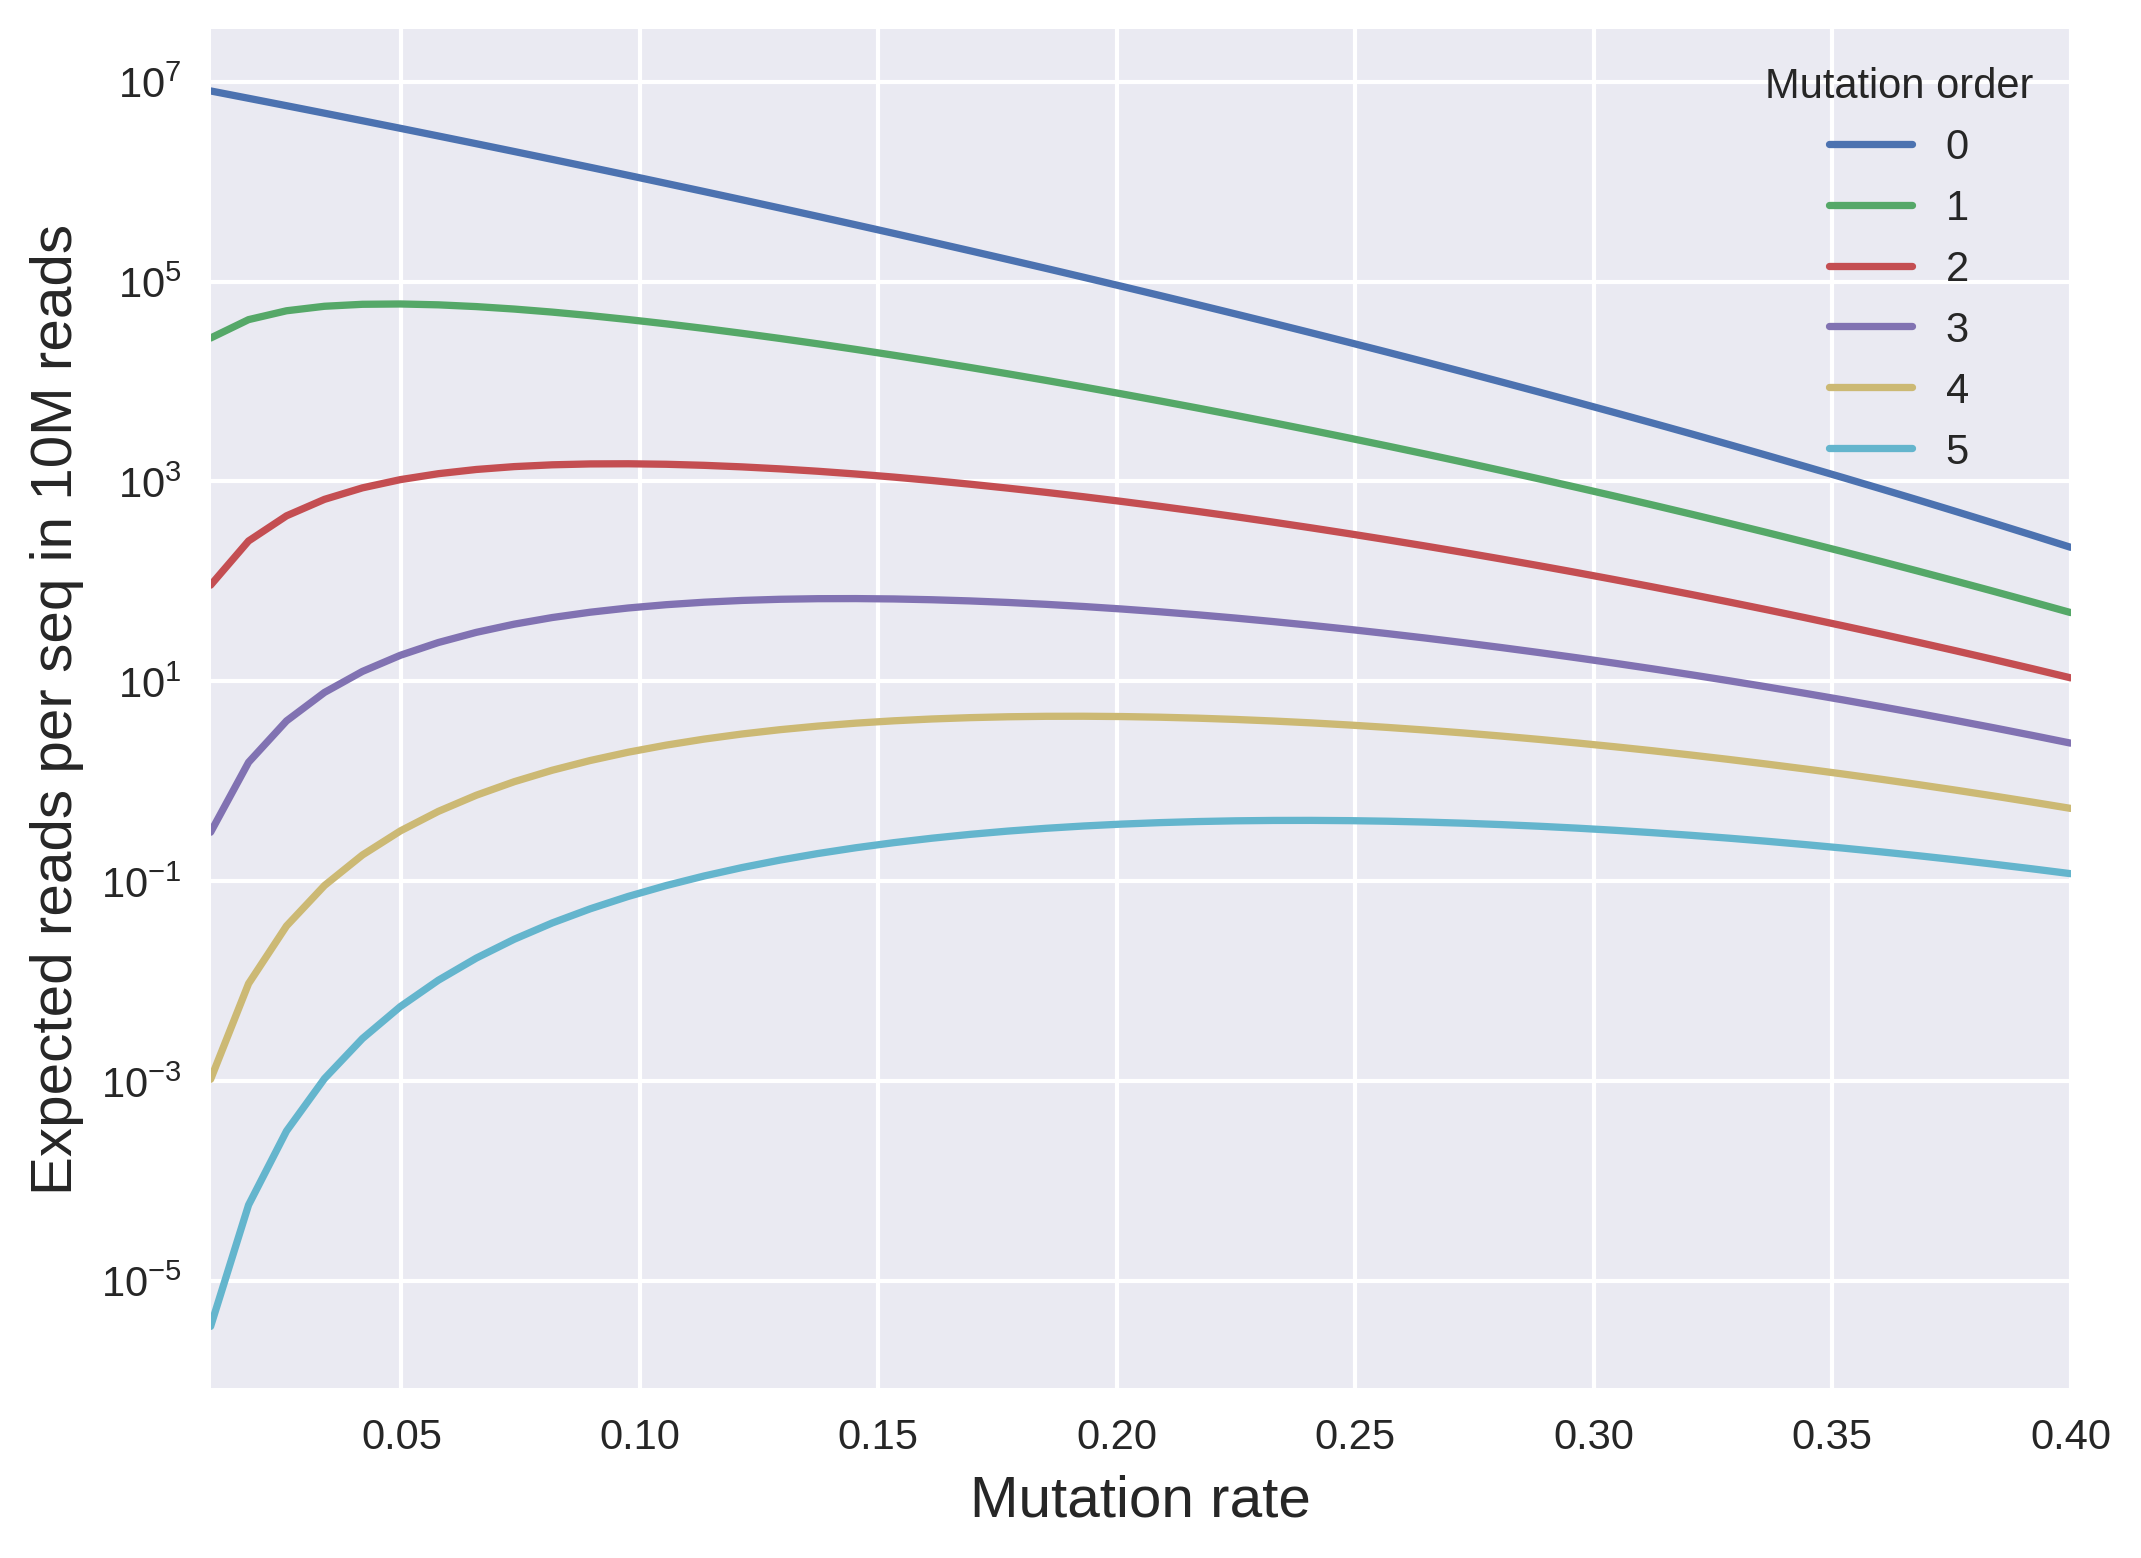

In [45]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300


plt.style.use('seaborn')

fig, ax = plt.subplots(1, 1, figsize=[8, 6])
dopedpool_tables['seq_counts_in_10M'].transpose().plot(ax=ax)
ax.set_yscale('log')
ax.set_xlabel('Mutation rate', fontsize=14)
ax.set_ylabel('Expected reads per seq in 10M reads', fontsize=14)
ax.legend(title='Mutation order', loc='upper right')
plt.show()